In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.misc import comb
import scipy as scp
import numpy as np
import matplotlib.pyplot as pl
import pickle as pkl
import sets
import random
import itertools
import os,sys,fnmatch
import timeit
import scipy.stats

In [2]:
def subsequence(sub,ref):
    '''
    A function to determine the number of specefic sequence repeated within a larger sequence.
    
    Parameters:
    sub:
    ref:
    
    
    Returns:
    idx : This an array containing the index of elements of sub in the ref! if idx is stricktly increasing the sequence sub
    is replayed whithin sequence ref!
    '''
    ref = np.array(ref)
    idx = np.array([])
    for ii in range(len(sub)):
        index = np.where(ref == sub[ii])[0]
        if index.size:
            idx = np.append(idx,index)
    idx = np.int0(idx)
    if idx.size:
        return idx, True
    else: 
        return [] , False
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
        supplied root directory.
    '''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield [path,filename]

In [9]:
leftFields = np.array([12,  6,  2, 17, 16, 21, 15, 27,  3, 11,  9,  7,  5, 20, 26, 22, 25,8, 23, 13, 24, 18,  4,  1, 10, 28])
rightFields = np.array([ 6,  9, 13, 25,  2,  8,  1,  7, 26, 28, 18, 14, 17, 22,  5, 12,  4])
test= np.arange(28)
pre = './dataFiles/rat614D1pre1st.seqz'
post = './dataFiles/rat614D1post1st.seqz'
seqzListPre = pkl.load(open(pre,'rb'))
seqzListPost = pkl.load(open(post,'rb'))

In [10]:
seqzPre = [seqzListPre[ii][:,0] for ii,sqz in enumerate(seqzListPre)]
seqzPost = [seqzListPost[ii][:,0] for ii,sqz in enumerate(seqzListPost)]

In [11]:
sqSize = []
PLrankCorrLPre = []
for item in seqzPre:
    if subsequence(item,rightFields)[1] and subsequence(item,rightFields)[0].size > 5:
        corrPL =  scipy.stats.pearsonr(subsequence(item,rightFields)[0],sorted(subsequence(item,rightFields)[0]))
        PLrankCorrLPre.append(corrPL)
    sqSize.append(item.size)
PLrankCorrLPost = []
for item in seqzPost:
    if subsequence(item,rightFields)[1] and subsequence(item,rightFields)[0].size > 5:
        corrPL =  scipy.stats.pearsonr(subsequence(item,rightFields)[0],sorted(subsequence(item,rightFields)[0]))
        PLrankCorrLPost.append(corrPL)
    sqSize.append(item.size)

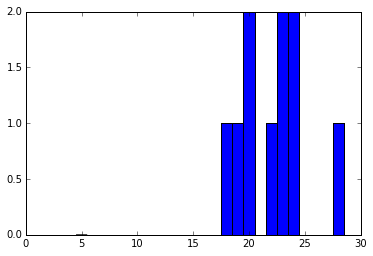

In [12]:
bins = np.arange(4.5,30.5,1)
pl.hist(sqSize,bins);

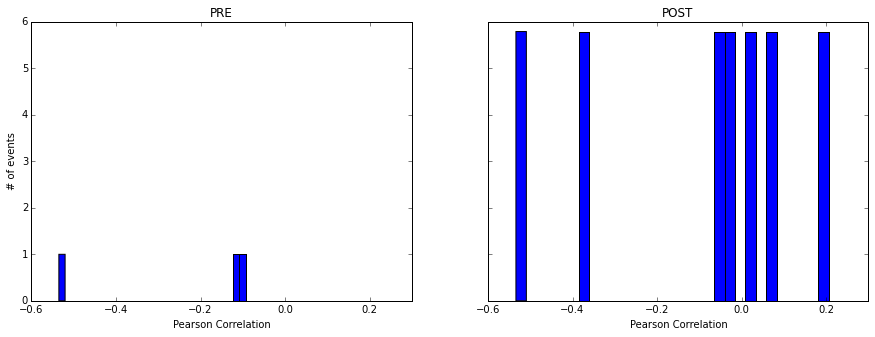

In [7]:
f,(ax1,ax2) = pl.subplots(1,2,figsize=[15,5],sharex=True,sharey=True)
ax1.hist(np.array(PLrankCorrLPre)[:,0],30);
ax2.hist(np.array(PLrankCorrLPost)[:,0],30,normed=True);
ax1.set_title('PRE')
ax2.set_title('POST')
ax1.set_ylabel('# of events')
ax1.set_xlabel('Pearson Correlation')
ax2.set_xlabel('Pearson Correlation')

In [8]:
for item in seqzPost:
    if subsequence(item,leftFields)[1] and subsequence(item,leftFields)[0].size>10:
        print item
        print subsequence(item,leftFields)[0]
        print sorted(subsequence(item,leftFields)[0])
        print '-----------------------------------------'

[ 20.   3.  18.  22.   2.   5.  12.  10.  21.  17.  16.  28.  15.   7.  13.
  25.   9.  24.  11.  19.   1.   4.   6.   8.  27.   0.  23.  14.]
[13  8 21 15  2 12  0 24  5  3  4 25  6 11 19 16 10 20  9 23 22  1 17  7 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
-----------------------------------------
[  0.  17.  22.  21.  15.   8.  12.   5.  27.  13.   4.   1.  24.  11.   7.
  28.  16.   6.   3.   9.]
[ 3 15  5  6 17  0 12  7 19 22 23 20  9 11 25  4  1  8 10]
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 17, 19, 20, 22, 23, 25]
-----------------------------------------
[ 10.  14.   9.   8.  28.  15.  27.  24.  17.   5.   3.  13.   4.   7.  11.
  16.   1.   6.  12.]
[24 10 17 25  6  7 20  3 12  8 19 22 11  9  4 23  1  0]
[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20, 22, 23, 24, 25]
-----------------------------------------
[  1.  14.  16.  15.   8.  27.   7.  17.  13.  11.   5.   6.   4.  24.  22.
   3.   9.  12.]
[23  4  6 17  7 11  3

In [52]:
subsequence(item,leftFields)

(9, True)

In [63]:
subsequence([1,16,18,17],np.arange(20))

(array([ 1, 16, 18, 17]), True)

In [67]:
scp.stats.pearsonr(np.array([ 17, 16, 18, 1]),sorted(np.array([ 1, 16, 18, 17])))

(-0.40721649484536082, 0.59278350515463896)

In [68]:
scp.stats.pearsonr(np.array([ 3, 2,4,1]),[1,2,3,4])

(-0.40000000000000002, 0.59999999999999976)

In [76]:
cosines = np.random.uniform(-1,1,10000)

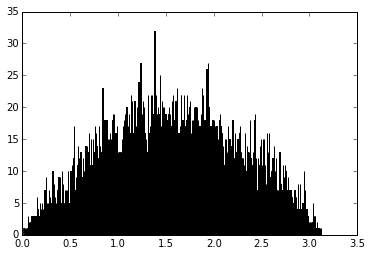

In [77]:
pl.hist(np.arccos(cosines),1000);